¡Hola Ilse! Como te va?

Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto Sprint 8 - Ilse Salinas
## Descripción general
La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Tienes acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos (del proyecto del sprint de Análisis estadístico de datos). Para esta tarea de clasificación debes crear un modelo que escoja el plan correcto. Como ya hiciste el paso de procesar los datos, puedes lanzarte directo a crear el modelo.

Desarrolla un modelo con la mayor exactitud posible. En este proyecto, el umbral de exactitud es 0.75. Usa el dataset para comprobar la exactitud.

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Ilse, siempre me tomo este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programadora ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser una gran Data Scientist"
    
Ahora si yendo a esta notebook. Quería felicitarte Ilse porque has logrado resolver todos los pasos implementando grandes lógicas, se ha notado tu manejo sobre python y las herramientas ML utilizadas. Muy bien hecho!

Tu trabajo está en condiciones de ser aprobado, te felicito nuevamente! Éxitos en tu camino dentro del mundo de los datos!

Saludos!

### Preprocesamiento de la información

In [1]:
# Se importan todas las librerias utilizadas para la elaboracion de este proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Estas otras son para la generacion del modelo 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Estas son liberias extras que considere en el desarrollo del proyecto
from sklearn.model_selection import validation_curve
from IPython.display import Image
from sklearn.model_selection import GridSearchCV

In [2]:
# Abrimos y examinamos el dataset del proyecto 
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()
print()

print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Excelente implementación de importaciones y carga de datos. Felicitaciones por mantener los procesos en celdas separadas! A la vez excelente implementación de los métodos para observar la composición de los datos!

In [3]:
# Para simplificar la tarea, en esta parte se convierte la columna de mb_used de megabytes a gigabytes
def mb_to_gb(megabytes):
    return megabytes / 1024

df['mb_used'] = df['mb_used'].apply(lambda x: mb_to_gb(x))
df.rename(columns={'mb_used': 'gb_used'}, inplace=True)
print(df.head(5)) 

   calls  minutes  messages    gb_used  is_ultra
0   40.0   311.90      83.0  19.448652         0
1   85.0   516.75      56.0  22.165000         0
2   77.0   467.66      86.0  20.566846         0
3  106.0   745.53      81.0   8.239639         1
4   66.0   418.74       1.0  14.162842         0


In [4]:
# Tambien se cambiara el tipo de las columnas calls y messages de flotante a entero
df['calls'] = df['calls'].astype(int)
df['messages'] = df['messages'].astype(int)
print(df.head(5))

   calls  minutes  messages    gb_used  is_ultra
0     40   311.90        83  19.448652         0
1     85   516.75        56  22.165000         0
2     77   467.66        86  20.566846         0
3    106   745.53        81   8.239639         1
4     66   418.74         1  14.162842         0


In [5]:
# Antes de proceder al analisis y planteamiento del modelo, se verifica si hay datos repetidos para poderlos descartar 
duplicados = df.duplicated()
print('Hay {} datos duplicados. No es necesario descartar datos.'.format(duplicados.sum()))

Hay 0 datos duplicados. No es necesario descartar datos.


In [6]:
# Es importante tambien definir en la columna is_ultra cuantos corresponden a este plan y cuantos al otro
# Si la columna tiene 1 es el plan Ultra si no es Smart
# is_ultra — plan para el mes actual (Ultra - 1, Smart - 0).
valores = df['is_ultra'].isin([0, 1])
conteo = df.loc[valores, 'is_ultra'].value_counts()

print("Cantidad de planes Smart:", conteo.get(0, 0))
print("Cantidad de planes Ultra:", conteo.get(1, 0))

Cantidad de planes Smart: 2229
Cantidad de planes Ultra: 985


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Excelente profundización sobre los tipos de datos de nuestras columnas y sobre el chequeo de duplicados.

### Segmentación de la Información
Después de haber revisado el conjunto de datos, procedemos al análisis y generación de modelo. Para ello hay que primero pensar en las características y objetivo correspondientes y verificar si se trata de un modelo de clasificación o numérica. 

Si repasamos el objetivo que la compañía Megaline desea obtener, el modelo debe ser de clasificacion binaria ya que el resultado depende de uno de los dos planes que se quiere recomendar pues radica entre Smart o Ultra. Por lo tanto la columna is_ultra debe de ser tratada con objetivo mientras que el resto de las columnas fungen el papel de características. Habiendo definido esto, se puede proceder a la segmentacion de los datos para generar los conjuntos de entrenamiento, validacion y prueba.

Como el conjunto de prueba no existe, en este caso los datos fuente se deben dividir en tres partes: entrenamiento, validación y prueba. Usualmente, el tamaño del conjunto de validación y del de prueba son iguales. Esto da como resultado una proporción de datos fuente de 3:1:1, es decir, 60% para el conjunto de entrenamiento, 20% para el conjunto de validación y 20% para el conjunto de prueba como se muestra en la siguiente imagen.

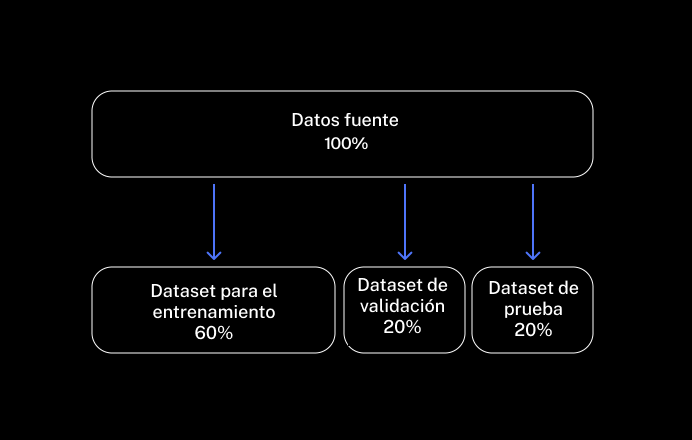

In [7]:
Image(filename='segmentacion.png', width=500, height=500)
# Los derechos de autor de esta imagen corresponde a Tripleten

### Procedimiento de Generación de un Modelo de Aprendizaje

Antes de continuar con el proyecto, es importante entender la razón por la que estos tres segmentos son esenciales para la generación del modelo. El modelo ciertamente antes de poder generar resultados necesita ser entrenado con información del dataset para poder después predecir y comparar información.
Es por ello que los tres segmentos de datos son indispensables, ya que el conjunto de entrenamiento su propósito, como bien dice su nombre, es entrenar al modelo para que después aprenda patrones dentro del conjunto de datos alimentándose de las características y objetivo y ajustando sus parámetros para minimizar la pérdida (o error) en estos datos.
Una vez que se tiene el modelo entrenado con la infromación, con el objetivo de verificar que esté funcionando correctamente, se le designa el conjunto de validación cuyo propísto es ajustar los hiperparámetros del modelo y evaluar su rendimiento.
Finalmente, con el objetivo de obtener el mejor resultado del modelo decidido, se compara la salida de los datos del conjunto de validación con el de prueba y verificar que conjunto de datos da un resultado de exactitud mayor. Hay que recordar que entre más cercano sea el valor de la exactitud al número uno, más preciso es el modelo al obtener o predecir un resultado siendo éste eficiente para la tarea en cuestión.  

En la siguiente imagen se puede observar a modo de diagrama el proceso descrito anteriormente para poder generar un modelo eficiente con el conjunto de datos mencionado.

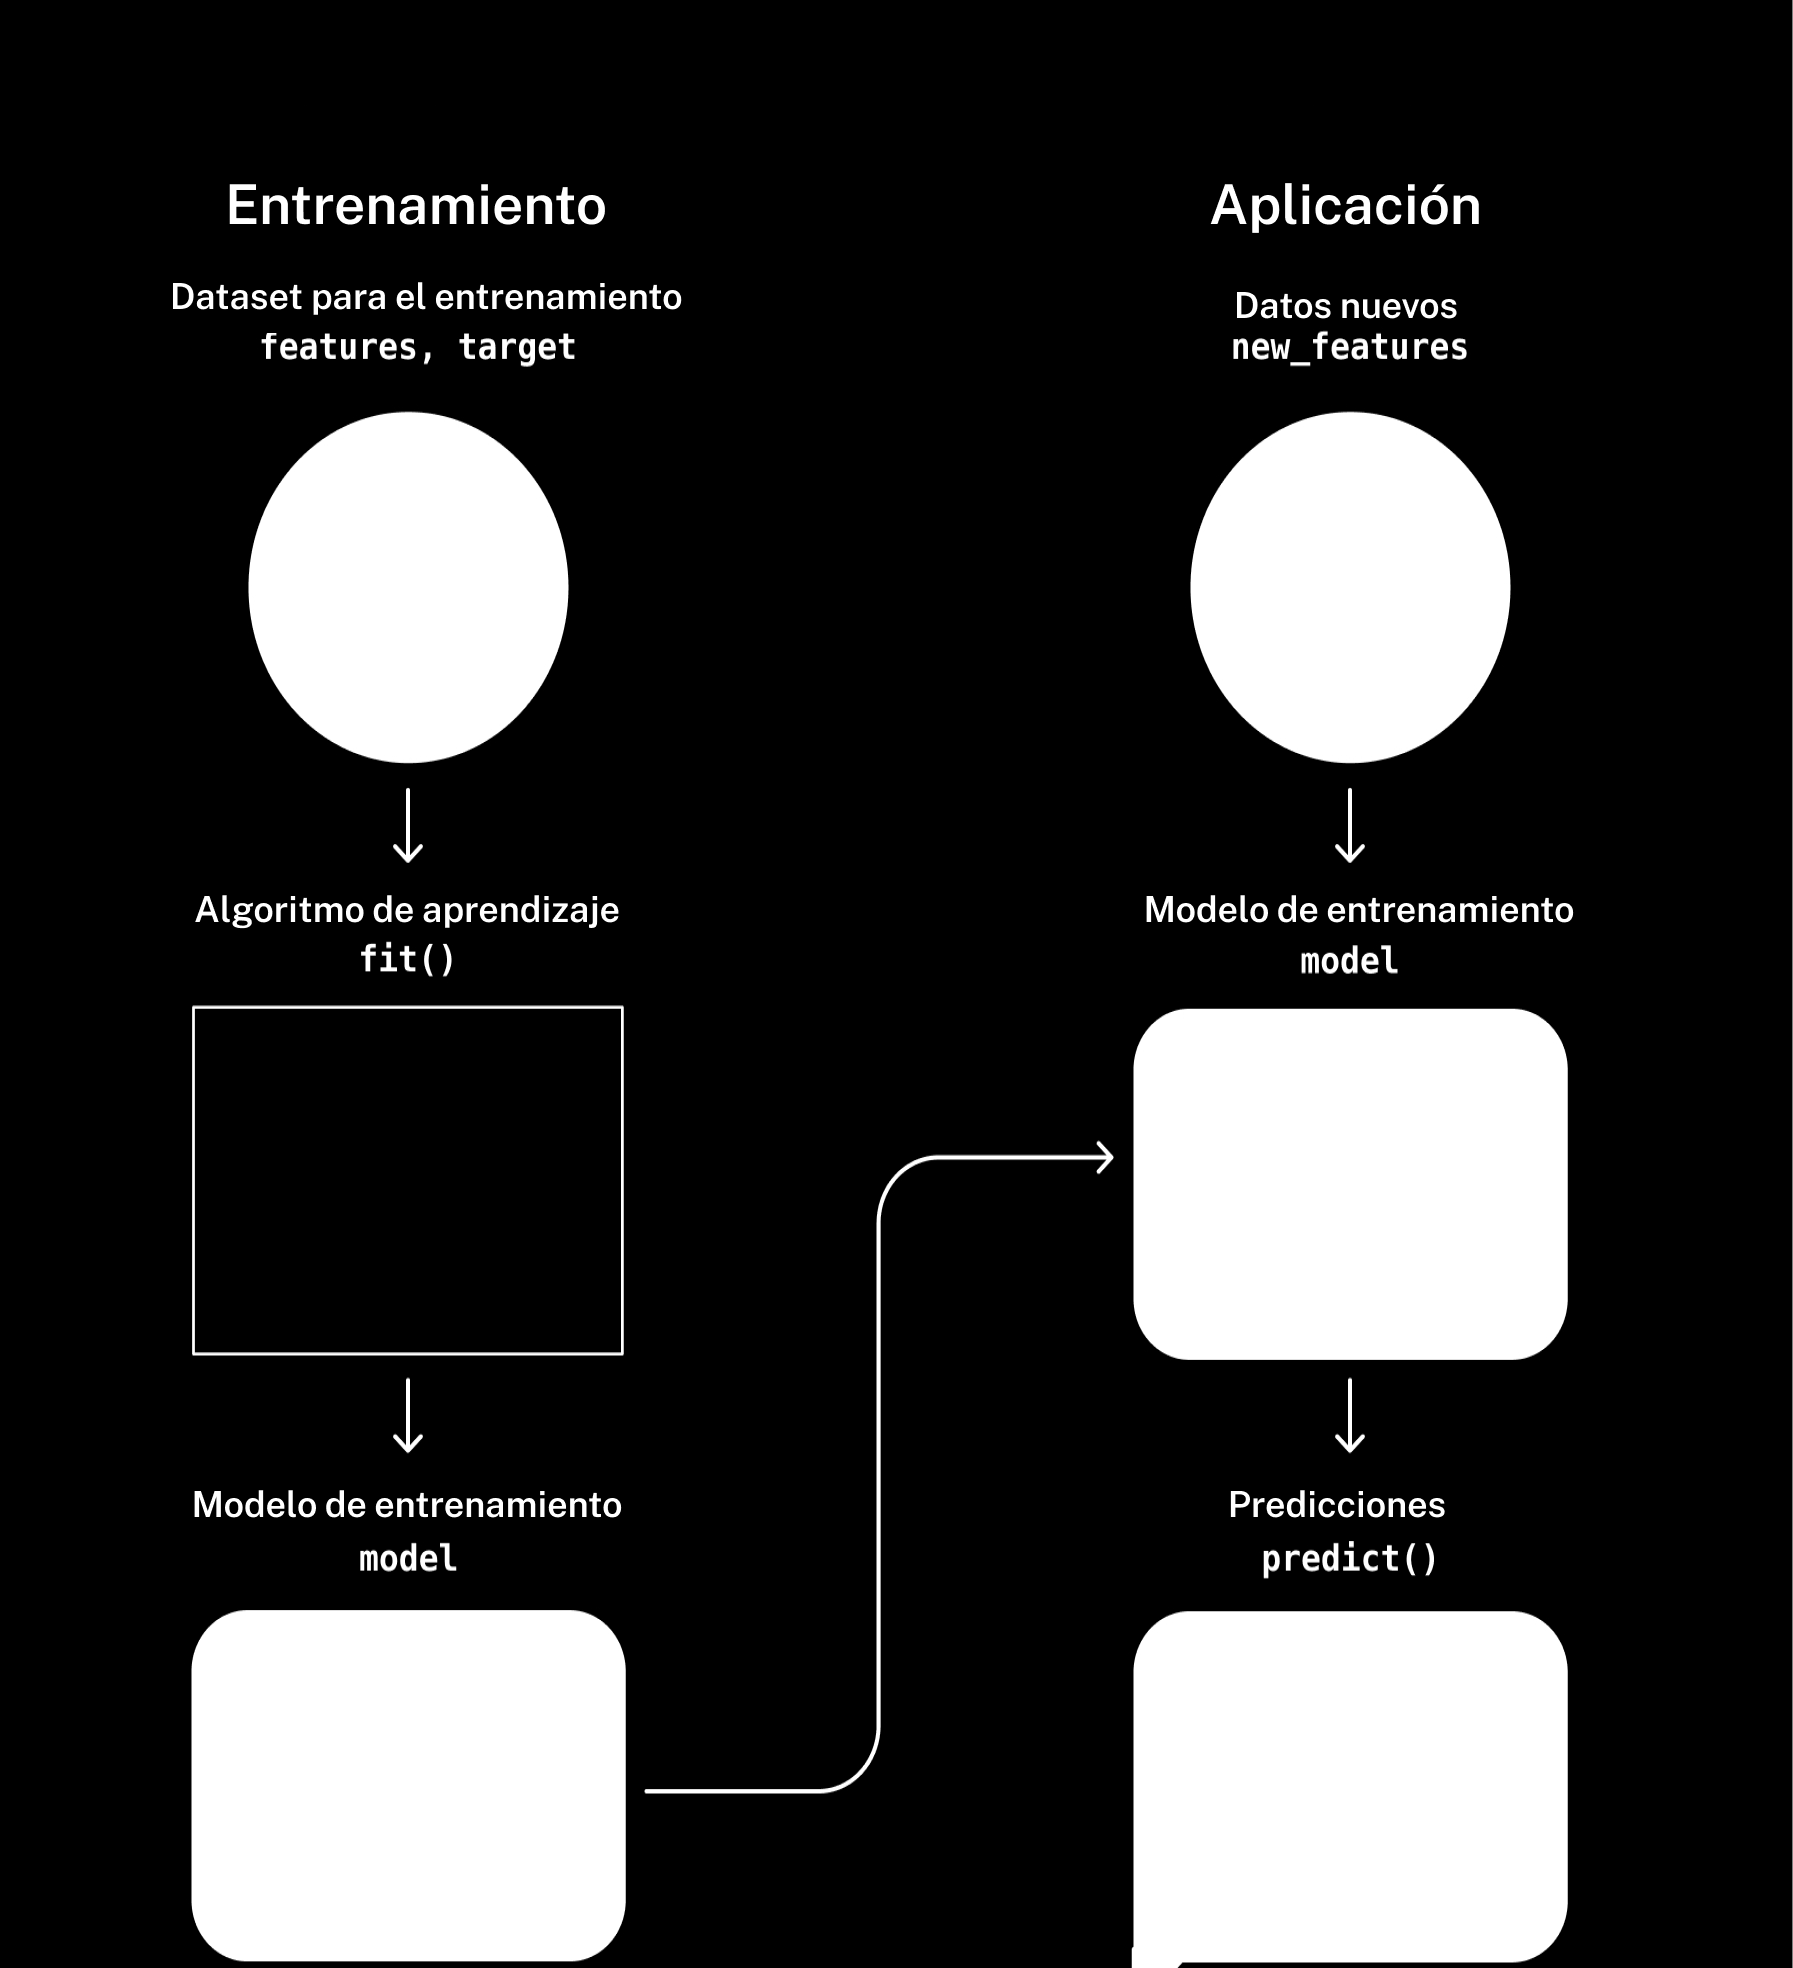

In [8]:
Image(filename='procedimiento.png', width=500, height=500)
# Los derechos de autor de esta imagen corresponde a Tripleten

A continuación, en el siguiente código se puede observar la forma en la que el dataset es dividido en tres segmentos para la elaboración del modelo.

In [9]:
# Después de este paso, se procede a segmentar los datos fuente en un conjunto de entrenamiento, validación y prueba.
# Se divide el conjunto de datos en entrenamiento (60%), validación (20%) y prueba (20%)
df_train, df_restante = train_test_split(df, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_restante, test_size=0.5, random_state=12345)

# Se definen las características y el objetivo para cada conjunto
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

print(features_train.shape)
print(target_train.shape)
print()

print(features_valid.shape)
print(target_valid.shape)
print()

print(features_test.shape)
print(target_test.shape)

(1928, 4)
(1928,)

(643, 4)
(643,)

(643, 4)
(643,)


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Perfecto Ilse, aquí hemos realizado la implementación perfecta sobre la división de los datos en los 3 conjuntos, tal como debíamos. A la vez te agradezco por tu cmopromiso con el proceso al agregar imagenes que respalden tus decisiones.

Ahora que se tienen los tres conjuntos de datos, procedemos a la aplicación de diferentes modelos cambiando los hiperparámetros. Este paso es necesario para identificar el mejor modelo para una clasficación binaria y que se adecué al resultado final ya que el umbral de exactitud esperado es de 0.75. Se estarán entonces comprobando los siguientes modelos a continuación: árbol de decisión, bosque aleatorio y regresión logística.

#### Árbol de decisión

Hay que pensar en un árbol de decisión como un condicional if sencillo anidado idefinidamente con otros hasta obtener el reusltado esperado. Dependiendo de que tan compleja queremos la respuesta mayor cantidad de condiciones agregadas al árbol, como si fuesen ramas. Es por eso que es importante definir que tan profundo o alto crecerá dicho árbol, por obvias razones entre más profundo o grande sea es mejor pero eso también tiene consecuencias como la exactitud del resultado y también la velocidad del modelo.

A continuación se muestran dos ejemplos, uno donde no se define la profundidad del árbol max_depth siendo su valor None de forma predeterminada y en el otro considerando un rango con base en el siguiente código. Este código es adicional al momento de decidir el valor de max_depth mediante el método de Curva de Validación. Este método se  puede visualizar mediante una gráfica, el cual proporcionará información sobre cómo varía el rendimiento del modelo en el conjunto de entrenamiento y el conjunto de validación a medida que cambias el valor de max_depth. 

Para dedfinir entonces el valor de max_depth, es importante observar que las líneas que representan el rendimiento en el conjunto de entrenamiento y el conjunto de validación sean similares ya que es cuando ambas alcanzan un nivel alto de rendimiento, esto puede ser un indicador de que el modelo está generalizando bien y no está sufriendo de sobreajuste ni subajuste.

##### Curva de Validacion para Árbol de decisión

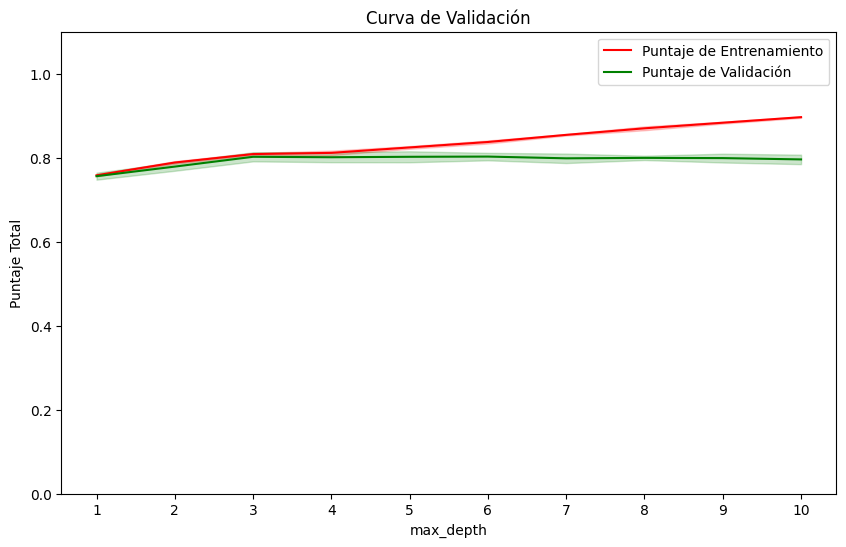

In [10]:
# Se define el rango de valores para max_depth, el valor elegido es de 1 a 10 de profundidad
param_range = np.arange(1, 11)

# Se calcula el puntaje de validacion para cada valor de max_depth
train_scores, valid_scores = validation_curve(
    DecisionTreeClassifier(), features_train, target_train, param_name="max_depth", param_range=param_range,
    scoring="accuracy", cv=5)

# Se calcula la media y la desviacion estandar de los puntajes de entrenamiento y validacion
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Se grafica la Curva de Validacion
plt.figure(figsize=(10, 6))
plt.title("Curva de Validación")
plt.xlabel("max_depth")
plt.ylabel("Puntaje Total")
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
plt.plot(param_range, train_scores_mean, label="Puntaje de Entrenamiento", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, valid_scores_mean, label="Puntaje de Validación", color="g")
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

Para este dataset, se puede observar que tanto para el conjunto de entrenamiento como para el conjunto de validación, sus valores son similares hasta una profundidad máxima de 3, ya que a partir de este punto en adelante se van separando las líneas lo cual puede resultar en un sobreajuste de los datos del modelo. Es por esta razón que en los siguientes códigos la elección del valor de este hiperparámetro sera de 1 a 4.  

##### Árbol de decisión sin profundidad máxima definida

In [11]:
# Arbol binario sin profundidad maxima
# Modelo 1:
# Se crea un modelo de árbol de decisiones sin considerar la profundidad del arbol, es decir que max_depth sea None
model_1 = DecisionTreeClassifier()

# Se entrena el modelo en el conjunto de entrenamiento
model_1.fit(features_train, target_train)

# Se predice en el conjunto de validación
predictions_valid_1 = model_1.predict(features_valid)

# Se evalua el rendimiento en el conjunto de validación
accuracy_valid_1 = accuracy_score(target_valid, predictions_valid_1)
print("Precisión en el conjunto de validación:", accuracy_valid_1)

# Se predice en el conjunto de prueba
predictions_test_1 = model_1.predict(features_test)

# Se evalua el rendimiento en el conjunto de prueba
accuracy_test_1 = accuracy_score(target_test, predictions_test_1)
print("Precisión en el conjunto de prueba:", accuracy_test_1)

Precisión en el conjunto de validación: 0.7278382581648523
Precisión en el conjunto de prueba: 0.7340590979782271


##### Árbol de decisión con profundidad máxima definida

In [12]:
# Repetiremos el mismo modelo que el anterior con la diferencia de que se ajustara el hiperparametro max_depth
for depth in range(1, 4):
    model_1_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_1_1.fit(features_train, target_train)
    
    print('Resultado Validación')
    predictions_valid_1_1 = model_1_1.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(target_valid, predictions_valid_1_1))
    print()
    
    print('Resultado Prueba')
    predictions_test_1_1 = model_1_1.predict(features_test)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(target_test, predictions_test_1_1))
    print()

Resultado Validación
max_depth = 1 : 0.7542768273716952

Resultado Prueba
max_depth = 1 : 0.7356143079315708

Resultado Validación
max_depth = 2 : 0.7822706065318819

Resultado Prueba
max_depth = 2 : 0.7744945567651633

Resultado Validación
max_depth = 3 : 0.7853810264385692

Resultado Prueba
max_depth = 3 : 0.7791601866251944



<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Excelente trabajo sobre el modelo de arbol de decisión Ilse, has implementado 3 procedimientos que nos permiten visualizar el rendimiento del mismo y has aplicado todos los pasos necesarios como por ejemplio haber aplicado un loop para ver como impactan los diferentes valores de hiperparámetros.

Conclusión

Como se puede observar en ambos modelos, el resultado final de la exactitud depende mucho del valor del hiperparámetro max_depth cuando es definido y cuando no. Este valor es importante ya que puede tener un impacto significativo en el rendimiento y la interpretación del modelo de árbol de decisiones. Una profundidad más grande puede permitir que el árbol capture relaciones más complejas en los datos, pero también puede aumentar el riesgo de sobreajuste. Es por esta razón que se fue un paso esencial considerar el resultado de la curva de validación para designar un valor que al mismo tiempo superara el valor esperado por la empresa Megaline. 

#### Bosque aleatorio

Un solo árbol a veces no es suficiente para poder encontrar la respuesta ideal o mejor eficiencia. Es por ello que el siguiente modelo no solo conidera como hiperparámetro la profundidad máxima sino también la cantidad de árboles que pueden componer el modelo de bosque aleatorio. Como este es otro hiperparámetro que puede afectar el valor final de la exactitud en el modelo, esta vez recurriremos a un método de la validación cruzada para definir de una mejor forma la cantidad de estimadores o árboles del bosque. Cabe mencionar que el método de la validación cruzada es una técnica utilizada en aprendizaje automático para evaluar el rendimiento de un modelo utilizando un conjunto de datos limitado. Consiste en dividir los datos disponibles en varios subconjuntos llamados "folds" o "pliegues". Luego, se entrena y evalúa el modelo varias veces, utilizando diferentes combinaciones de pliegues como datos de entrenamiento y prueba en cada iteración.

##### Validación Cruzada para Bosque aleatorio

In [13]:
# Se definen diferentes rangos limites como hiperparámetros para n_estimators a ajustar
param_grid = {
    'n_estimators': [10, 50, 100, 200]  # Define el rango de valores para n_estimators
}

# Se inicializa el clasificador de bosque aleatorio
rf = RandomForestClassifier(random_state=54321)

# Se inicializa la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Se realiza la búsqueda de cuadrícula en el conjunto de entrenamiento
grid_search.fit(features_train, target_train)

# Se obtiene el mejor modelo y su puntuación en el conjunto de validación
best_estimator = grid_search.best_estimator_
validation_score = grid_search.best_score_

print("El mejor número de estimadores encontrado:", best_estimator.n_estimators)
print("Puntuación de validación del mejor modelo:", validation_score)

El mejor número de estimadores encontrado: 200
Puntuación de validación del mejor modelo: 0.8101796648946907


Con base en este resultado, dado que la exactitud ya está alcanzado valores de 0.8 para arriba, superando las expecativas de los esperado por la compañía, se empleará el rango de 1 hasta 200 árboles como estimadores aunque esto pueda representar que el modelo sea haga más lento en dar una respuesta.

In [14]:
# Modelo 2:
best_score = 0
best_est = 0
best_depth = 0

# Bucle para definir numero de estimadores (cantidad de arboles del modelo)
for est in range(1, 200): # Se define est de 1 a 200 de acuerdo con el resultado de la validacion cruzada
    for depth in range(1, 4):  # Se define max_depth de acuerdo con la curva de validacion de antes
        model_2 = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth)
        # Se entrena el modelo en el conjunto de entrenamiento
        model_2.fit(features_train, target_train)  
        # Se calcula la puntuación de accuracy en el conjunto de validación
        score = model_2.score(features_valid, target_valid)  
        if score > best_score: 
            # Se guardan los mejor valores correspondiente a la puntuacion de accuracy del conjunto de validacion, numero de estimadores que corresponden a la mejor puntuación de exactitud y la profundidad máxima que corresponde a la mejor puntuación de exactitud
            best_score = score
            best_est = est
            best_depth = depth

# Se entrena el mejor modelo en el conjunto de entrenamiento y se evalua en el conjunto de prueba
best_model = RandomForestClassifier(random_state=54321, n_estimators=best_est, max_depth=best_depth)
best_model.fit(features_train, target_train)
validation_score = best_model.score(features_valid, target_valid)  # Puntuación de validación del mejor modelo
test_score = best_model.score(features_test, target_test)  # Puntuación de prueba del mejor modelo

# Se comparan los resultados de exactitud entre el conjunto de validacion y prueba
print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}, max_depth = {}): {}".format(best_est, best_depth, validation_score))
print("La exactitud del mejor modelo en el conjunto de prueba (n_estimators = {}, max_depth = {}): {}".format(best_est, best_depth, test_score))

La exactitud del mejor modelo en el conjunto de validación (n_estimators = 33, max_depth = 3): 0.7978227060653188
La exactitud del mejor modelo en el conjunto de prueba (n_estimators = 33, max_depth = 3): 0.7791601866251944


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Nuevamente un proceso similar, bien hecho! A la vez felicitaciones por aplicar el método de GridSearch para buscar los mejores hiperparametros, excelente!
    

Conclusión

Al final en el modelo, como rewsultado presenta que el mejor valor de la exactitud es cuando los hiperparámetros de profundidad y estimadores son de 3 y 33 aproximadamente. Como el modelo lo hicimos con base en la validación cruzada, puede ser que hubiera sido mejor ocupar menos cantidad de árboles ya que el resultado no supera los 100. Esto puede hacer que el modelo sea más rápido y también eficiente con el resultado final. 

#### Regresión Logística

La regresión logística es un tipo de modelo utilizado en aprendizaje automático para predecir la probabilidad de que ocurra un resultado binario, como sí/no, verdadero/falso, o positivo/negativo. En otras palabras, toma datos de entrada y los utiliza para predecir la probabilidad de que ocurra un resultado específico.

In [15]:
# Modelo 3: 
# Se inicializa el constructor de regresión logística con los parámetros
model_3 = LogisticRegression(random_state=54321, solver='liblinear')

# Se entrena el modelo en el conjunto de entrenamiento
model_3.fit(features_train, target_train)

# Se calcula la puntuación de precisión en el conjunto de entrenamiento
score_train = model_3.score(features_train, target_train)

# Se calcula la puntuación de precisión en el conjunto de validación
score_valid = model_3.score(features_valid, target_valid)

print("Precisión del modelo de regresión logística en el conjunto de entrenamiento:", score_train)
print("Precisión del modelo de regresión logística en el conjunto de validación:", score_valid)

# Después de evaluar en el conjunto de validación, evalúa el modelo en el conjunto de prueba
score_test = model_3.score(features_test, target_test)
print("Precisión del modelo de regresión logística en el conjunto de prueba:", score_test)

Precisión del modelo de regresión logística en el conjunto de entrenamiento: 0.7520746887966805
Precisión del modelo de regresión logística en el conjunto de validación: 0.7573872472783826
Precisión del modelo de regresión logística en el conjunto de prueba: 0.7433903576982893


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Un modelo más tradicional pero lo has aplicado perfectamente Ilse, bien hecho!

#### Prueba de cordura
La prueba de cordura, en el contexto de aprendizaje automático, implica verificar si el modelo desarrollado tiene sentido desde una perspectiva lógica o de dominio del problema. Esta prueba puede variar según el tipo de modelo y el problema específico que estés abordando. A menudo implica verificar si las predicciones del modelo tienen sentido en relación con el conocimiento previo del dominio del problema.

Es por ello que en el siguiente código, se utiliza la librería DummyClassifier. Este clasificador se entrena para predecir siempre la clase más frecuente en el conjunto de entrenamiento. Luego, se emplean las características del conjunto de validación para realizar predicciones con este clasificador Dummy. Se calculan diversas métricas de evaluación, tales como precisión, recall y F1-score, comparando estas predicciones del modelo Dummy con las etiquetas verdaderas del conjunto de validación.

Al comparar las métricas obtenidas con el modelo Dummy con las métricas de tu modelo real, puedes evaluar si tu modelo real supera una predicción tan simple como predecir siempre la clase más frecuente. Esta comparación proporciona una medida inicial de la calidad de tu modelo y te ayuda a identificar posibles problemas.

In [16]:
# Entrenar un clasificador Dummy que predice siempre la clase más frecuente
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)

# Obtener predicciones del modelo Dummy en el conjunto de validación
predicciones_dummy = dummy_clf.predict(features_valid)

# Calcular métricas de evaluación para el modelo Dummy
accuracy_dummy = accuracy_score(target_valid, predicciones_dummy)
precision_dummy = precision_score(target_valid, predicciones_dummy)
recall_dummy = recall_score(target_valid, predicciones_dummy)
f1_dummy = f1_score(target_valid, predicciones_dummy)

print("Métricas del modelo Dummy:")
print("Accuracy:", accuracy_dummy)
print("Precision:", precision_dummy)
print("Recall:", recall_dummy)
print("F1 Score:", f1_dummy)

Métricas del modelo Dummy:
Accuracy: 0.7060653188180405
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

    
Aquí el proceso del modelo de cordura es correcto, DummyClassifier es un metodo adecuado sin embargo podríamos mejorarlo si tenemos en cuenta un valor de stratey como constant. Te invito a que investigues en los mejores parametros para un modelo constante.

## Conclusión

Como bien fue de esperarse, entre mejor definidos estén los hiperparámetros del modelo, mejor tipo de respuestas en cuanto a la exactitud de éste tendremos. Para este proyecto, como el objetivo era poder sino es que superar o encontrar un valor igual o mayor a 0.75, el mejor modelo adecuado es el bosque aleatorio a pesar de que su velocidad disminuya a medida de agregar mayor cantidad de árboles o profundidad en ello. No obstante es conocido por ser un modelo donde su exactitud es más alta que en los otros dos presentados para un modelo de clasificación binaria. Tomando en cuenta esta información, es como la empresa Megaline puede abordar mejor a sus clientes y la probabilidad de poder promocionar sus nuevos planes hacia Ultra que tiene mayor número de beneficios a futuro tanto para ellos como en relfexión a las ganancias de la empresa.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)
    
</b> <a class="tocSkip"></a>

Quería felicitarte Ilse porque has tenido un gran compromiso con tus conclusiones y con tus códigos a lo largo de todo el trabajo, el trabajo refleja tu gran capacidad por lo que felicitiaciones!